- 过滤法（Filter）：按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
- 封装法（Wrapper）：根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
- 嵌入法（Embedded）：先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(123)

In [58]:
credit_df = pd.read_csv('credit_card_default.csv')

In [59]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [60]:
credit_df.shape

(30000, 24)

In [61]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [62]:
credit_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [63]:
pd.set_option('display.max_columns',30)
pd.set_option("display.max_rows",50)

In [64]:
credit_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [65]:
credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [66]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [67]:
X = credit_df.iloc[:,:-1]
y = credit_df['default payment next month']

In [68]:
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

### 创建一个简单的函数用来做网格搜索和拟合模型

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# 网格搜索的第一参数是学习器,可以把分类模型或者回归模型放进去

#GridSearchCV(
#    estimator,
#    param_grid,
#    scoring=None,
#    n_jobs=None,
#    iid='warn',
#    refit=True,
#    cv='warn',
#    verbose=0,
#    pre_dispatch='2*n_jobs',
#    error_score='raise-deprecating',
#    return_train_score=False,
#)

def get_best(model, params, X, y):
    grid = GridSearchCV(model, params, cv=5, refit=True)  
    grid.fit(X, y)
    print ("准确率: {}".format(grid.best_score_))
    print ("最佳参数: {}".format(grid.best_params_))

### 创建分类器

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr_params = {'C':[1e-2, 1e-1, 1e0, 1e1], 'penalty':['l1', 'l2']}
knn_params = {'n_neighbors': [3, 5, 7, 9]}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11]}

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

### 评估三个分类器的效果

In [72]:
get_best(lr, lr_params, X, y)

准确率: 0.8099
最佳参数: {'C': 10.0, 'penalty': 'l1'}


In [73]:
get_best(knn, knn_params, X, y)

准确率: 0.7665666666666666
最佳参数: {'n_neighbors': 9}


In [74]:
get_best(dt, tree_params, X, y)

准确率: 0.8206333333333333
最佳参数: {'max_depth': 3}


### 基于距离的分类器knn的结果不太理想,需要来个标准化  
- 此处也可以来MinMaxScaler RobustScaler Normalizer

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### 注意:网格搜索和流水线联合使用,需要指定流水线程序上各个组件的名字和此组件的超参数
- pipeline类的说明

Pipeline of transforms with a final estimator. 

Sequentially apply a list of transforms and a final estimator.一系列的转化和一个最终的学习器

Intermediate steps of the pipeline must be 'transforms', that is, they must implement fit and transform methods.

流水线的中间组件必须是转化操作,这些操作必须实现fit和transform接口
**注意: 实现这些接口是有一定标准的,需要继承父类来实现**

The final estimator only needs to implement fit.最后的学习器只需要实现fit接口

In [76]:
# 网格搜索可以对流水线上的各个组件的超参数进行交叉组合,前提是需要指定环节的名字和对应的参数
knn_pipe_params = {'classifier__n_neighbors':[3,5,7,9]}
print(knn_pipe_params)
# 创建一个标准化组件
ss = StandardScaler()
# 创建流水线,此流水线上有两个组件,分别是标准化器和分类器(学习器)
knn_pipe = Pipeline([('scale', ss), ('classifier', knn)])
# 因为流水线最后的组件是个学习器,所以可以把流水线对象当做学习器传到网格搜索函数里,并传入流水线上各个组件的参数
get_best(knn_pipe, knn_pipe_params, X, y)

{'classifier__n_neighbors': [3, 5, 7, 9]}
准确率: 0.8046333333333333
最佳参数: {'classifier__n_neighbors': 9}


### 特征筛选

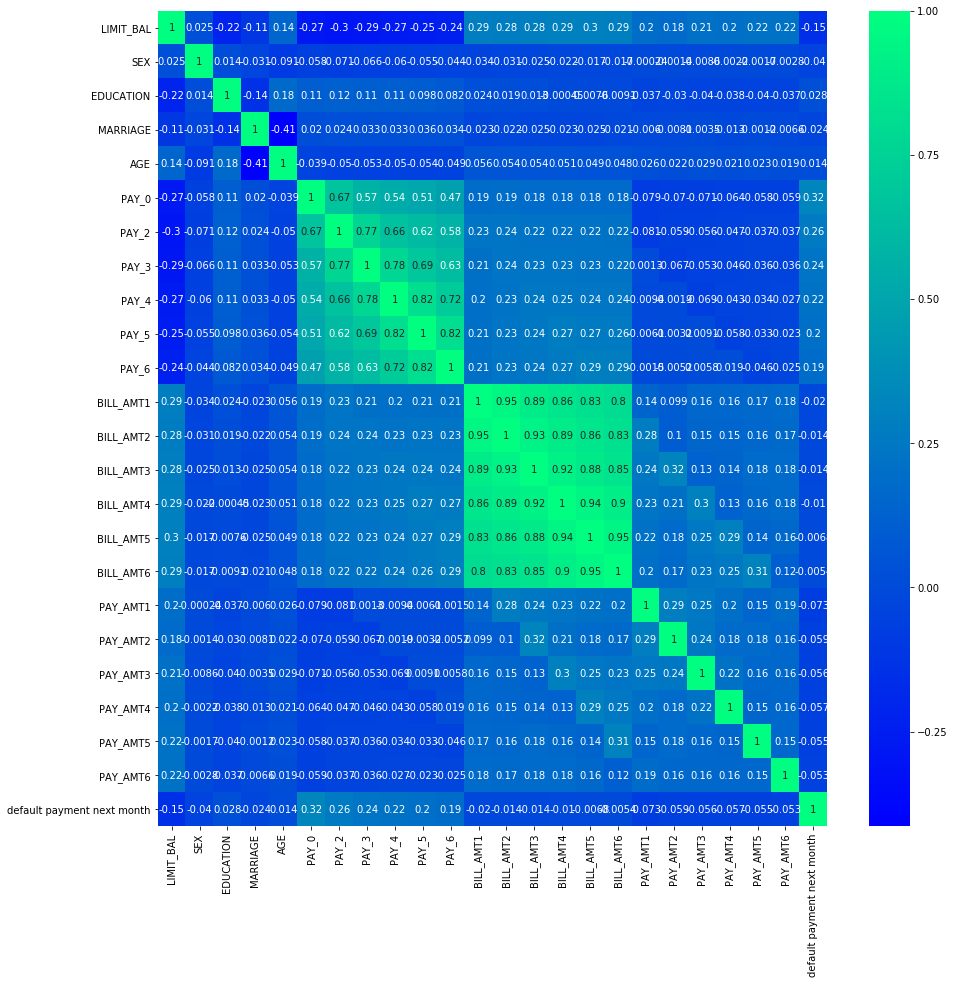

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.figure(figsize=(15,15))
sns.heatmap(credit_df.corr(),annot=True,cmap='winter')

#### 1.1 基于相关系数的特征筛选

In [78]:
credit_df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [79]:
# 选出因变量相关系数列
credit_df.corr()['default payment next month']  

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [80]:
credit_df.corr()['default payment next month'].abs() > .2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [81]:
# 找到较高的相关系数对应的列名
highly_correlated_features = credit_df.columns[credit_df.corr()['default payment next month'].abs() > .2]
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [82]:
highly_correlated_features = highly_correlated_features.drop('default payment next month')
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [83]:
# 使用筛选出来的列做模型看效果
X_subsetted = X[highly_correlated_features]
get_best(dt, tree_params, X_subsetted, y)  

准确率: 0.8213333333333334
最佳参数: {'max_depth': 3}


- 可以看到结果变好了

In [84]:
from sklearn.base import TransformerMixin, BaseEstimator

#### 自定义一个类 用来找到相关系数高于某个阈值的列,阈值需要作为参数传入


- 要实现fit和transform接口,需要继承这两个接口的父类

In [101]:
class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        self.response = response
        self.threshold = threshold
        self.cols_to_keep = cols_to_keep
        
    def fit(self, X, *_):
        df = pd.concat([X, self.response], axis=1)
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self
    
    def transform(self, X):
        return X[self.cols_to_keep]
    
#     def fit_transform(self):
#         pass

- 该类实现了fit,transform方法,可以放到流水线里

In [102]:
# 实例化一个特征筛选类
ccc = CustomCorrelationChooser(threshold=.2, response=y)

In [104]:
ccc.fit_transform(X)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,-1,-1,0,0
8,0,0,2,0,0
9,-2,-2,-2,-2,-1


In [87]:
# 调用fit方法,完成筛选列
ccc.fit(X)
ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [88]:
# 调用transform方法,完成对数据的转化
ccc.transform(X).head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0


In [89]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0


- 注意,很多sklearn里的函数实现了fit_transform接口,因此可以直接调用fit_transform方法来完成对数据的transform 我们自定义的类是分别定义的fit和transform,所以分两步调用

In [90]:
# 后面需要用到深拷贝,所以导入copy包
import copy

In [98]:
# 定义流水线中决策树部分的超参数
tree_pipe_params = {'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13]}
ccc_pipe_params = {'corr_select__threshold':[0,0.1,0.2,0.3]}
pipe_params = {'corr_select__threshold':[0,0.1,0.2,0.3],'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13],}
pipe_params

{'corr_select__threshold': [0, 0.1, 0.2, 0.3],
 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13]}

In [100]:
# 实例化一个基于相关系数的特征筛选对象
ccc = CustomCorrelationChooser(response=y)

# 做一个流水线,组件包括特征筛选和预测两步
ccc_pipe = Pipeline([('corr_select', ccc), 
                     ('classifier', dt)])

# ccc_pipe_params =copy.deepcopy(tree_pipe_params)
# pipe_params = tree_pipe_params.update(ccc_pipe_params)
# 定义流水线中特征筛选部分的超参数
# ccc_pipe_params.update({ 'correlation_select__threshold':[0, .1, .2, .3]})
print(pipe_params)

# 使用网格搜索,对流水线中的两个组件进行最适超参数
get_best(ccc_pipe, pipe_params, X, y)

{'corr_select__threshold': [0, 0.1, 0.2, 0.3], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13]}
准确率: 0.8207
最佳参数: {'classifier__max_depth': 3, 'corr_select__threshold': 0.2}


#### 1.2 基于方差的特征筛选

In [101]:
X.std()**2 

LIMIT_BAL    1.683446e+10
SEX          2.392474e-01
EDUCATION    6.246510e-01
MARRIAGE     2.724523e-01
AGE          8.496976e+01
PAY_0        1.262930e+00
PAY_2        1.433254e+00
PAY_3        1.432492e+00
PAY_4        1.366885e+00
PAY_5        1.284114e+00
PAY_6        1.322472e+00
BILL_AMT1    5.422240e+09
BILL_AMT2    5.065705e+09
BILL_AMT3    4.809338e+09
BILL_AMT4    4.138716e+09
BILL_AMT5    3.696294e+09
BILL_AMT6    3.546692e+09
PAY_AMT1     2.743423e+08
PAY_AMT2     5.308817e+08
PAY_AMT3     3.100051e+08
PAY_AMT4     2.454286e+08
PAY_AMT5     2.334266e+08
PAY_AMT6     3.160383e+08
dtype: float64

In [106]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542
8,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0


In [107]:
# 导入方差阈值模块
from sklearn.feature_selection import VarianceThreshold
# 遍历不同的阈值,查看高于此阈值的列都有哪些
for thresh in [0, 1, 2, 3, 300000, 1000000000]:
    var = VarianceThreshold(threshold=thresh)
    print(var.fit_transform(X).shape)

(30000, 23)
(30000, 20)
(30000, 14)
(30000, 14)
(30000, 13)
(30000, 7)


In [108]:
# 组装流水线,把基于方差筛选特征组件和学习器组件组装到流水线上
variance_pipe = Pipeline([('variance', VarianceThreshold()), 
                          ('classifier', dt)])
variance_pipe_params = copy.deepcopy(tree_pipe_params)

variance_pipe_params.update({ 'variance__threshold':[.05, .1, .15, .2, .25, .3, .4, .5,10000,500000]})

print(variance_pipe_params)
# 预测
get_best(variance_pipe, variance_pipe_params, X, y)  

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13], 'variance__threshold': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 10000, 500000]}
准确率: 0.8206333333333333
最佳参数: {'classifier__max_depth': 3, 'variance__threshold': 0.05}


#### 1.3 基于假设检验的阈值筛选,包括F检验,卡方检验等

In [112]:
# 选择最好的K个
from sklearn.feature_selection import SelectKBest

# F检验和卡方检验
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2 

In [113]:
# 选择基于F检验的最好的7个特征
k_best = SelectKBest(f_classif, k=7)

In [114]:
k_best.fit_transform(X, y)

array([[ 20000,      2,      2, ...,     -1,     -2,     -2],
       [120000,     -1,      2, ...,      0,      0,      2],
       [ 90000,      0,      0, ...,      0,      0,      0],
       ...,
       [ 30000,      4,      3, ...,     -1,      0,      0],
       [ 80000,      1,     -1, ...,      0,      0,     -1],
       [ 50000,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [115]:
temp = k_best.fit_transform(X, y)

In [116]:
temp.shape

(30000, 7)

In [117]:
# p_value 小概率事件发生的概率 原假设是两个变量不相关，如果p_value<0.05 代表小概率事件发生,说明变量是相关的，反之代表变量不相关
print(k_best.pvalues_)
p_values = pd.DataFrame({'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
p_values.head()

[1.30224395e-157 4.39524880e-012 1.22503803e-006 2.48536389e-005
 1.61368459e-002 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.89929659e-315 1.12660795e-279 7.29674048e-234 6.67329549e-004
 1.39573624e-002 1.47699827e-002 7.85556416e-002 2.41634443e-001
 3.52122521e-001 1.14648761e-036 3.16665676e-024 1.84177029e-022
 6.83094160e-023 1.24134477e-021 3.03358907e-020]


,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279


In [118]:
p_values[p_values['p_value'] < .05]

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279
10,PAY_6,7.296740e-234
0,LIMIT_BAL,1.302244e-157
17,PAY_AMT1,1.146488e-36
18,PAY_AMT2,3.166657e-24
20,PAY_AMT4,6.830942e-23


In [119]:
p_values[p_values['p_value'] >= .05]

,column,p_value
14,BILL_AMT4,0.078556
15,BILL_AMT5,0.241634
16,BILL_AMT6,0.352123


In [124]:
# 把基于F检验的KBest组装到流水线
k_best = SelectKBest(f_classif)

select_k_pipe = Pipeline([('k_best', k_best), 
                          ('classifier', dt)])

select_k_best_pipe_params = copy.deepcopy(tree_pipe_params)

select_k_best_pipe_params.update({'k_best__k':list(range(1,23))+['all']}) # all代表所有特征是函数的参数
print (select_k_best_pipe_params)
get_best(select_k_pipe, select_k_best_pipe_params, X, y)  

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13], 'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all']}
准确率: 0.8213333333333334
最佳参数: {'classifier__max_depth': 3, 'k_best__k': 5}


In [125]:
# 把基于卡方检验的KBest组装到流水线
k_best = SelectKBest(chi2)
select_k_pipe = Pipeline([('k_best', k_best), 
                          ('classifier', dt)])

select_k_best_pipe_params = copy.deepcopy(tree_pipe_params)

select_k_best_pipe_params.update({'k_best__k':list(range(1,23))}) # all代表所有特征是函数的参数
print (select_k_best_pipe_params)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
temp = mm.fit_transform(X)
get_best(select_k_pipe, select_k_best_pipe_params, temp, y) 

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13], 'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]}
准确率: 0.8213333333333334
最佳参数: {'classifier__max_depth': 3, 'k_best__k': 5}


In [122]:
# 基于互信息的特征筛选
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

In [123]:
k_best = SelectKBest(mutual_info_classif,5)
k_best

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x000002341A3A28C8>)

In [116]:


select_k_pipe = Pipeline([('k_best', k_best), 
                          ('classifier', d_tree)])

select_k_best_pipe_params = copy.deepcopy(tree_pipe_params)

select_k_best_pipe_params.update({'k_best__k':list(range(1,23))+['all']}) # all代表所有特征是函数的参数
print (select_k_best_pipe_params)
get_best(select_k_pipe, select_k_best_pipe_params, X, y) 

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13], 'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all']}
Best Accuracy: 0.8215666666666667
Best Parameters: {'classifier__max_depth': 3, 'k_best__k': 5}
